In [2]:
import pandas as pd 
import seaborn as sns


In [3]:
df = pd.read_csv('data/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]


In [4]:

#Phần 1: Xử lý dữ liệu cơ bản

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [5]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)


In [6]:
df.head(5)


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [7]:
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)


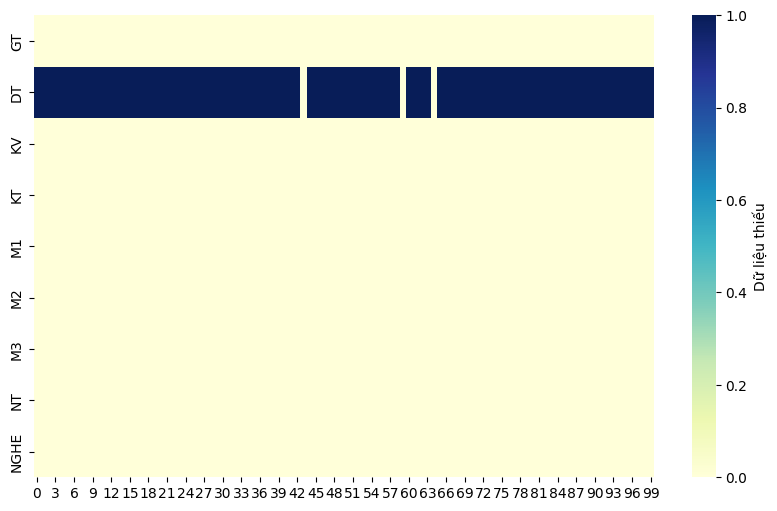

In [8]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()


In [9]:

df['DT'].fillna('KINH', inplace=True)


C:\Users\HKP\AppData\Local\Temp\ipykernel_13488\1398388736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\HKP\AppData\Local\Temp\ipykernel_13488\1398388736.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)


In [10]:
df['M1'].fillna(df['M1'].mean(), inplace=True)


C:\Users\HKP\AppData\Local\Temp\ipykernel_13488\3438690677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['M1'].fillna(df['M1'].mean(), inplace=True)


In [11]:
df['M2'].fillna(df['M2'].median(), inplace=True)


C:\Users\HKP\AppData\Local\Temp\ipykernel_13488\3881721429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['M2'].fillna(df['M2'].median(), inplace=True)


In [12]:
df['M3'].fillna(0, inplace=True)


C:\Users\HKP\AppData\Local\Temp\ipykernel_13488\2171302398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['M3'].fillna(0, inplace=True)


In [13]:

# Phần 2: Kỹ thuật Feature Engineering

df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667


In [14]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL


In [15]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3


In [16]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3,0.0
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3,0.0


In [17]:
# giá trị lớn nhất(M1,M2,M3)
df['MaxM'] = df[['M1', 'M2', 'M3']].max(axis=1)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS,MaxM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0,4.50
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0,6.00
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0,6.75
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0,5.25
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,FAIL,G3,0.0,6.25
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,FAIL,G3,0.0,5.25
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,FAIR,G3,0.0,8.00
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,FAIL,G3,0.0,5.50


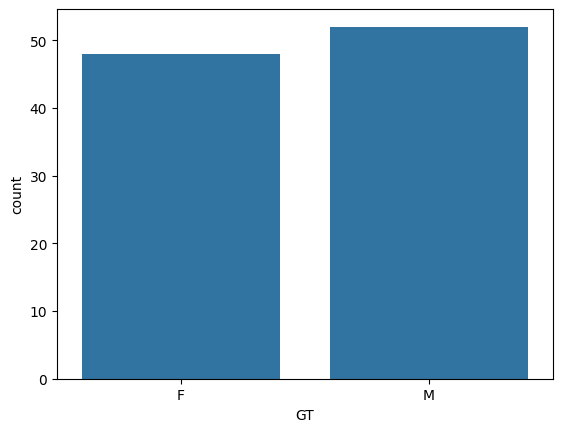

In [18]:


# Phần 3: Trực quan hóa dữ liệu

sns.countplot(x='GT', data=df)
plt.show()


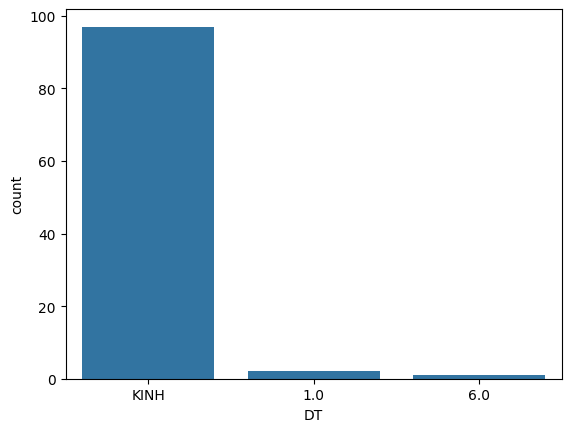

In [19]:

'''
Sinh viên tự làm tương tự cho các cột DT
--> Dựa trên biểu đồ DT cho biết tại sao 
    ta không phân tích theo phân nhóm DT
'''

sns.countplot(x='DT', data=df)
plt.show()

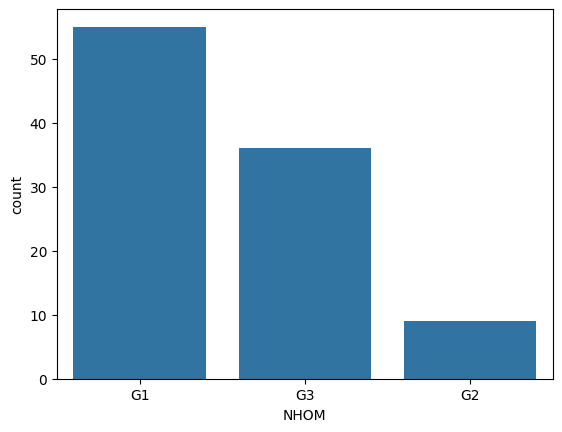

In [20]:
'''
Sinh viên tự làm tương tự cho các cột NHOM
--> Dựa trên biểu đồ NHOM 
    hãy cho biết nhóm nào có lượng thí sinh đông nhất 
    và thấp nhất
'''
sns.countplot(x='NHOM', data=df)
plt.show()

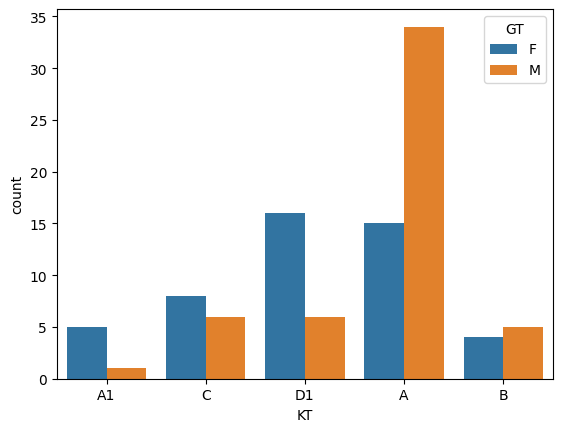

In [21]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()


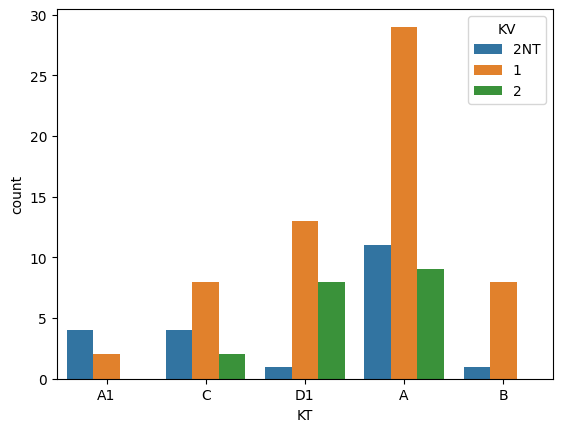

In [22]:

'''
Sinh viên tự làm tương tự cho các nhóm 
biến định tính: (KV,KT)
-->Hãy cho biết khối A có sinh viên khu vực nào đăng ký nhiều nhất
'''
sns.countplot(x='KT', hue='KV',data=df)
plt.show()


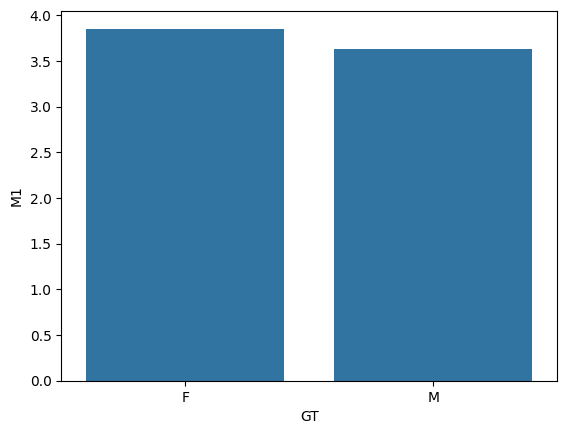

In [23]:

sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()


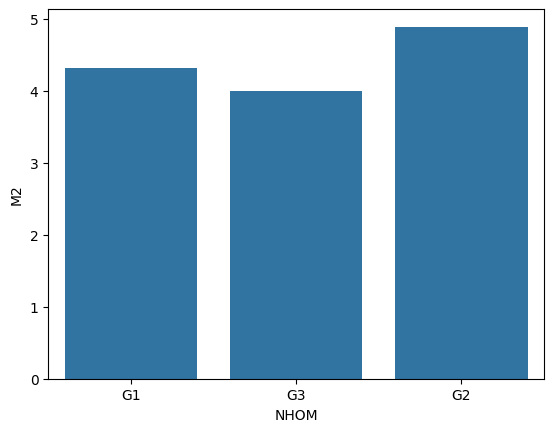

In [24]:

'''
Hãy so sánh trung bình điểm M2 theo NHOM
-> Cho biết nhóm thi nào có điểm thi M2 cao nhất
'''
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

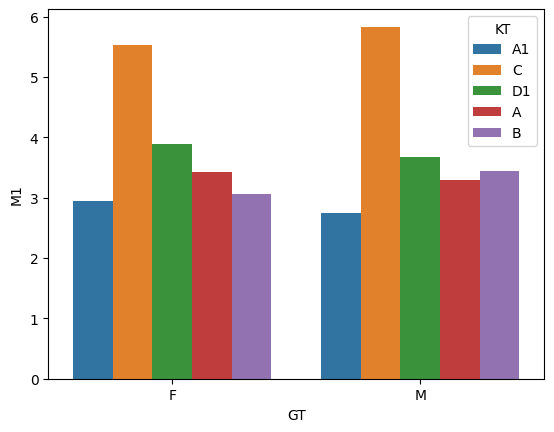

In [25]:

sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()


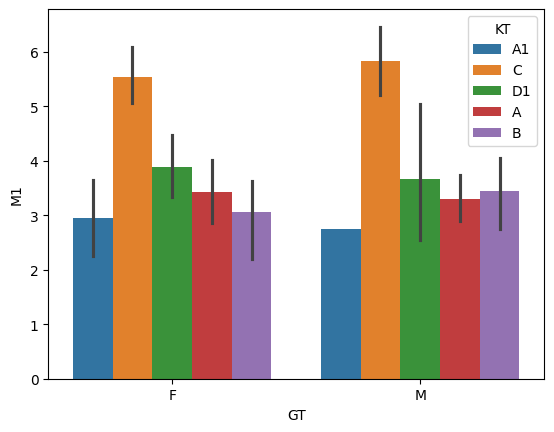

In [26]:
# GIÁ TRỊ SAI SỐ
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()


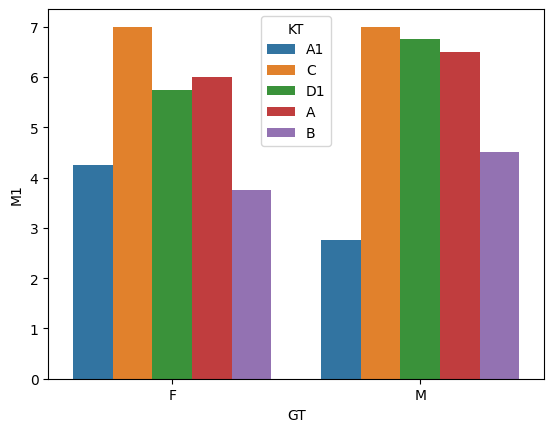

In [27]:

sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()


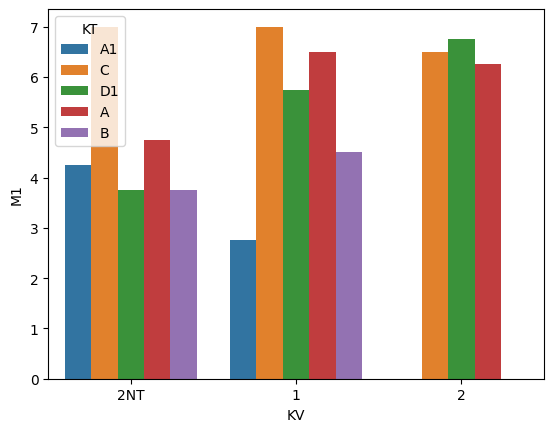

In [28]:
# cẦN
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()


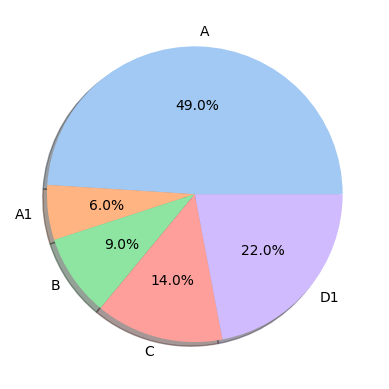

In [29]:

gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()


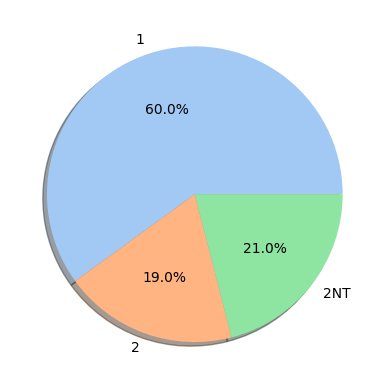

In [30]:

'''
Sinh viên tự viết thống kê tỉ lệ phần trăm cho KV
'''

gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index # labels = ['1','2','2NT']
data = list(gb['count']) # data= [60,19,21]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()


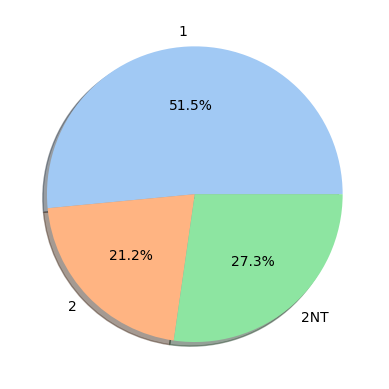

In [31]:

gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()


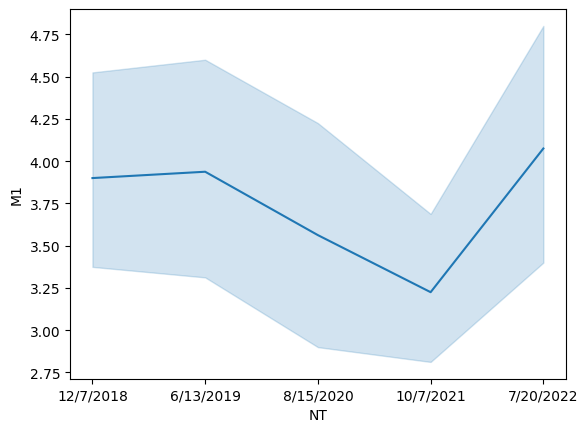

In [32]:

sns.lineplot(x='NT', y='M1', data=df)
plt.show()


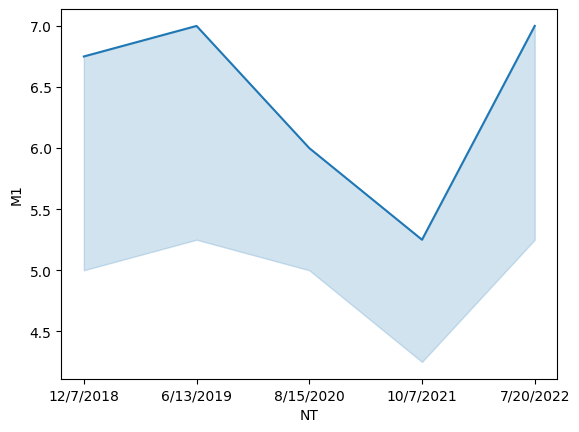

In [33]:
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()


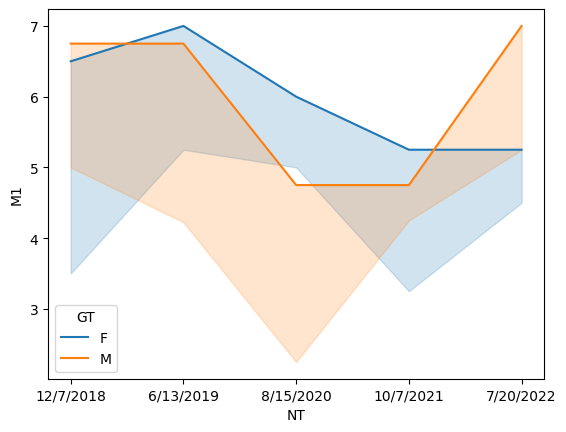

In [34]:

sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()


In [35]:

# Phần 4: Phân tích mô tả định lượng - THỐNG KÊ MÔ TẢ

print(f'{df["M1"].min()}\n{df["M1"].max()}\n')


1.0
7.0



In [36]:
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')


3.74
3.625

0    A
Name: KT, dtype: object

2.5



In [37]:

# Hãy tính phân vị thứ 9 trong thập phân vị (gọi là p9) cho M1 và M2. Gợi ý: phân vị thứ 9 có tỉ lệ là 0.9

df['M1'].max() - df['M1'].min()

df[['M1','M2']].max() - df[['M1','M2']].min()


M1    6.0
M2    6.5
dtype: float64

In [38]:

# Bài tập
# Hãy tính khoảng range cho M1 và M2
df[['M1','M2']].max() - df[['M1','M2']].min()

df['M1'].quantile(0.75) - df['M1'].quantile(0.25)


np.float64(2.25)

In [39]:

# Hãy tính độ lớn khoảng IQR cho M1 và M2

# Bài tập
# Hãy tính độ lớn khoảng dao động của M2 (gợi ý: |range|)
# Hãy tính độ lớn của IQR của M2 là bao nhiêu (gợi ý: |IQR|)
# Hãy tính khoảng giá trị IQR của M2 (gợi ý: [Q1;Q3])

np.mean(np.abs(df['M1'] - np.mean(df['M1'])))


np.float64(1.1600000000000001)

In [40]:

# Hãy tính độ lệch trung bình cho M1 và M2

df['M1'].var()

df['M1'].std()

print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())


M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [41]:

df[['M1','M2']].std()/df[['M1','M2']].mean()


M1    0.380858
M2    0.249131
dtype: float64

In [42]:

df['M1'].describe()


count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [43]:

df[['M1','M2','M3']].describe()


,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [44]:

cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)


[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [45]:

# Bài tập: Sinh viên viết code để tìm ra giá trị cv lớn nhất và nhỏ nhất của M1, M2, M3
# Hãy sắp xếp tăng dần danh sách các giá trị cv

# Phân tích đơn biến định lượng (univariate analysis)

df['M1'].describe()
df[['M1','M2','M3']].describe()

df.groupby('GT')['M1'].describe()


,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [46]:
# Câu hỏi: Đánh giá xem nhóm giới tính nào thi M1 tốt hơn

df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()
# Câu hỏi đặt ra: 
# Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ
# Lưu ý: Chỉ dùng 2 dòng code để thể hiện kết quả

# Trực quan dữ liệu phân tích univariate analysis


GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

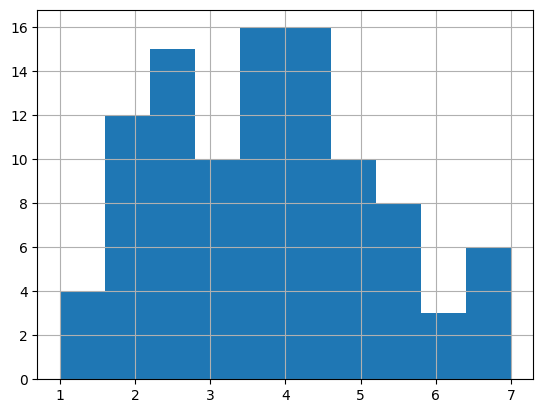

In [47]:

df['M1'].hist()
plt.show()


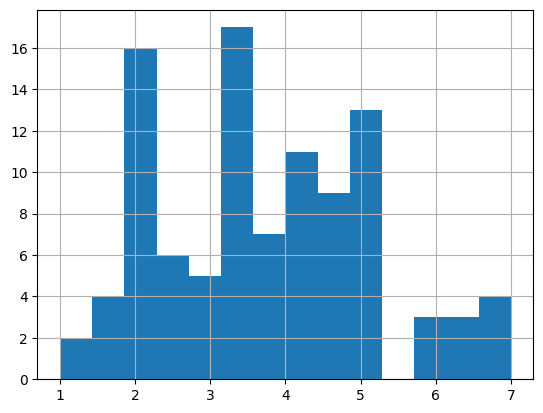

In [76]:

df['M1'].hist(bins=14)
plt.show()


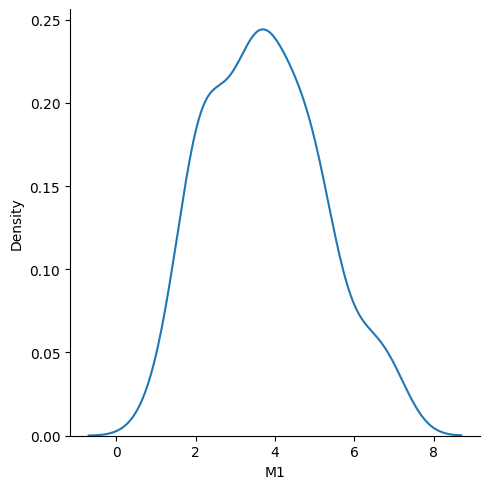

In [49]:

sns.displot(df, x='M1', kind='kde')
plt.show()


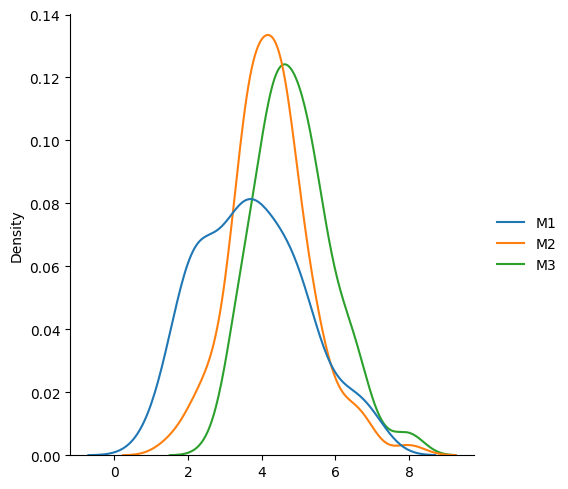

In [50]:

sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()
# Hãy cho biết phân phối của biến số nào gần với phân phối chuẩn hơn


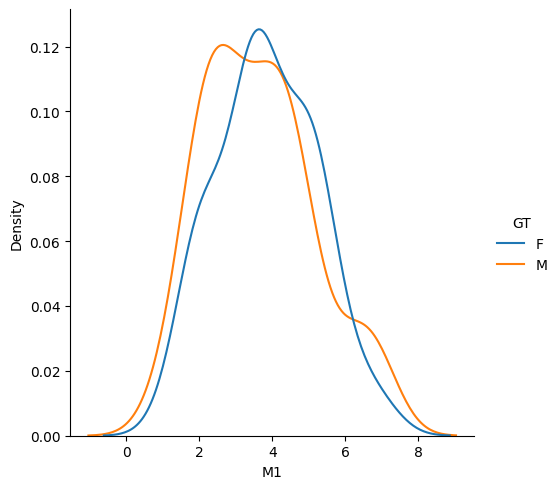

In [51]:

sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()
# Câu hỏi: Nhóm giới tính nào có phân phối điểm gần phân phối chuẩn


In [77]:

df['M1'].skew()


np.float64(0.33322084231625376)

In [78]:

df[['M1','M2','M3']].skew()


M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [79]:

df[['M1']].kurtosis()
# Câu hỏi: biến M1 có độ nhọn như thế nào


M1   -0.517004
dtype: float64

In [53]:

df[['M1','M2','M3']].kurtosis()
# Hãy cho biết dạng phân phối nào là thin, fat và fit


M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

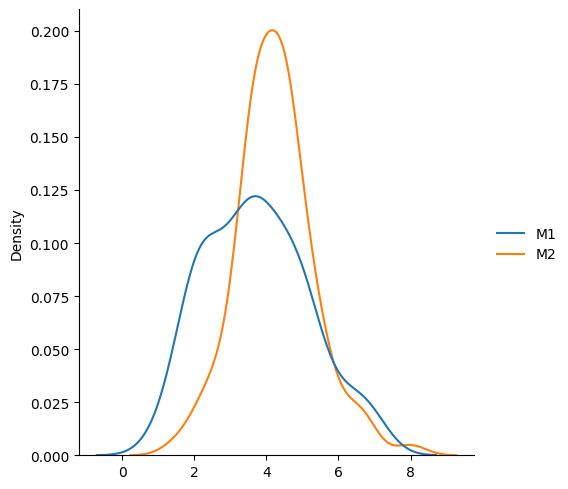

"\nCâu hỏi: Nhìn biểu đồ hãy cho biết ý nghĩa của kutorsis \ncủa 'M1','M2'\n"

In [54]:

sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()
'''
Câu hỏi: Nhìn biểu đồ hãy cho biết ý nghĩa của kutorsis 
của 'M1','M2'
'''


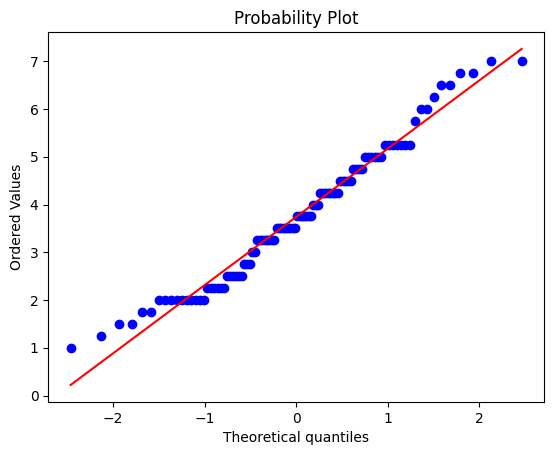

In [55]:


from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()
# Hãy cho biết phân phối M1 có gần như phân phối chuẩn hay không


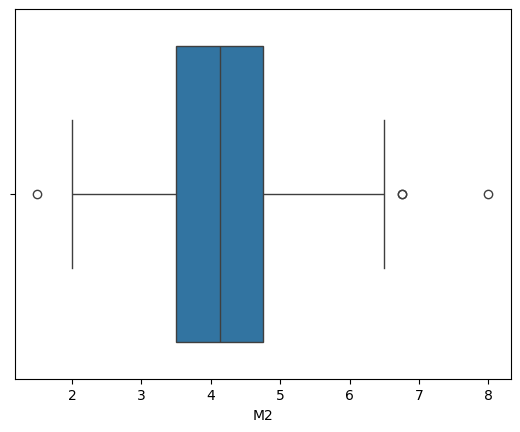

In [56]:

sns.boxplot(data=df['M2'], orient="h")
plt.show()
# Với điểm M2
# Hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường


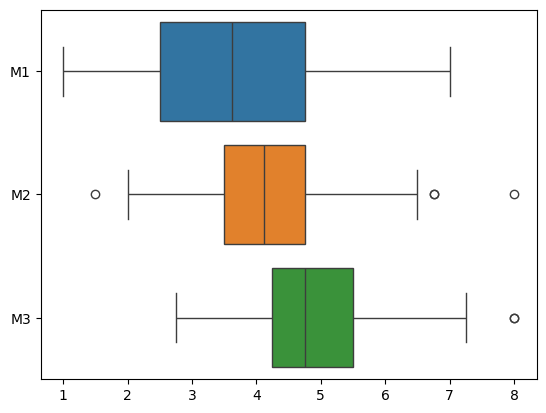

In [57]:

sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()
# Câu hỏi: Hãy cho biết điểm số môn nào không xảy ra bất thường


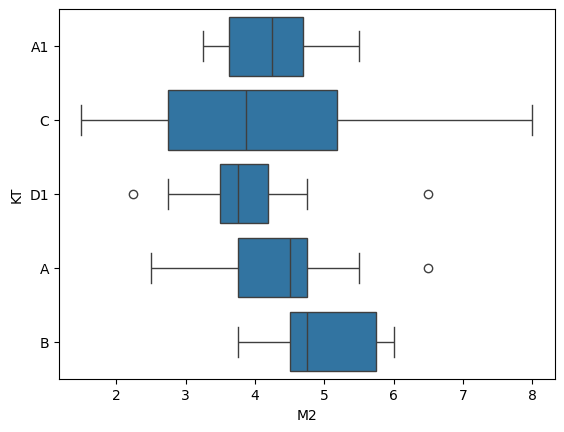

In [58]:

sns.boxplot(x='M2', y='KT',data=df, orient='h')
plt.show()
# Câu hỏi: Khối thi nào có lower bound trùng với tứ phân vị thứ 1 (tức là Q1)


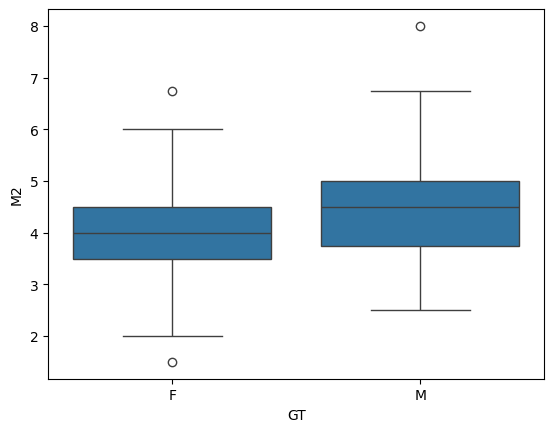

In [59]:

sns.boxplot(x='GT',y='M2',data=df)
plt.show()
# 1. M2 trên giới tính nào có bất thường
# 2. Có dễ dàng dự báo M2 theo yếu tố giới tính (GT) hay không?


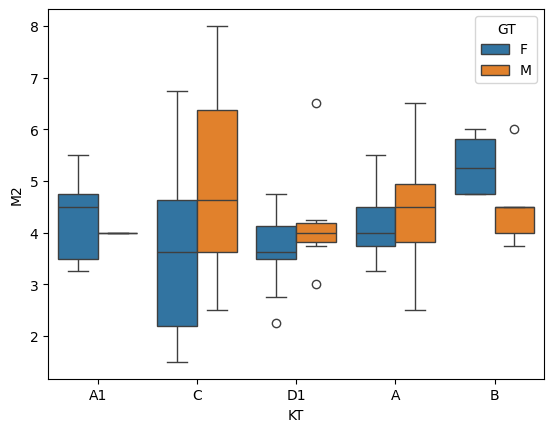

In [60]:

sns.boxplot(x='KT', y='M2',hue='GT',data=df)
plt.show()
# Câu hỏi: Xác định các biểu đồ có dữ liệu bất thường 


In [61]:

# Phân tích đa biến định lượng (multivariate analysis)
df[['M1','M2']].cov()

# Bài tập: Xây dựng ma trận phương sai M1, M2, M3.
# So sánh sự tương quan (ảnh hưởng, tác động, liên hệ) giữa 
# M1 so với M3 
# M2 so với M3


,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


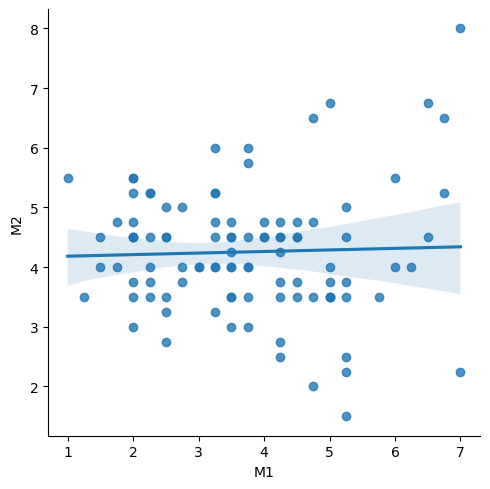

In [62]:

df[['M1','M2']].corr()

sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()


In [63]:

# Câu hỏi: Vẽ biểu đồ khám phá tương quan tuyến tính giữa M2 và M3

df[['M1','M2','M3']].corr()
# Câu hỏi: Hãy viết code sắp xếp tăng dần mức độ tác động (tương quan tuyến tính) của M2, M3 đến M1
# Câu hỏi: Hãy viết code tìm cặp tương quan tuyến tính cao nhất


,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


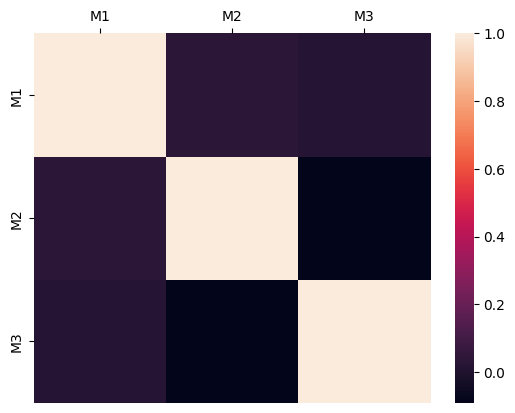

In [ ]:

sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()


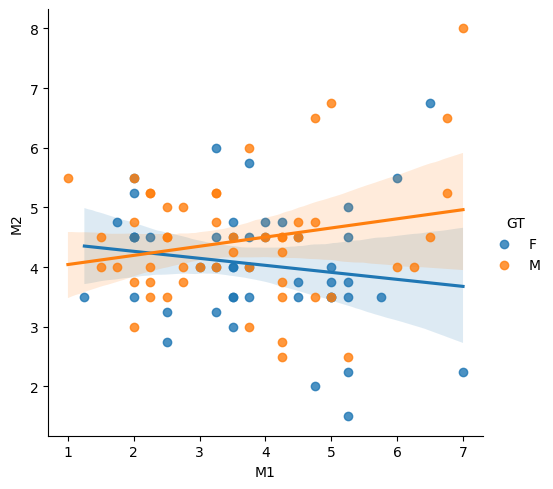

In [65]:

sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()


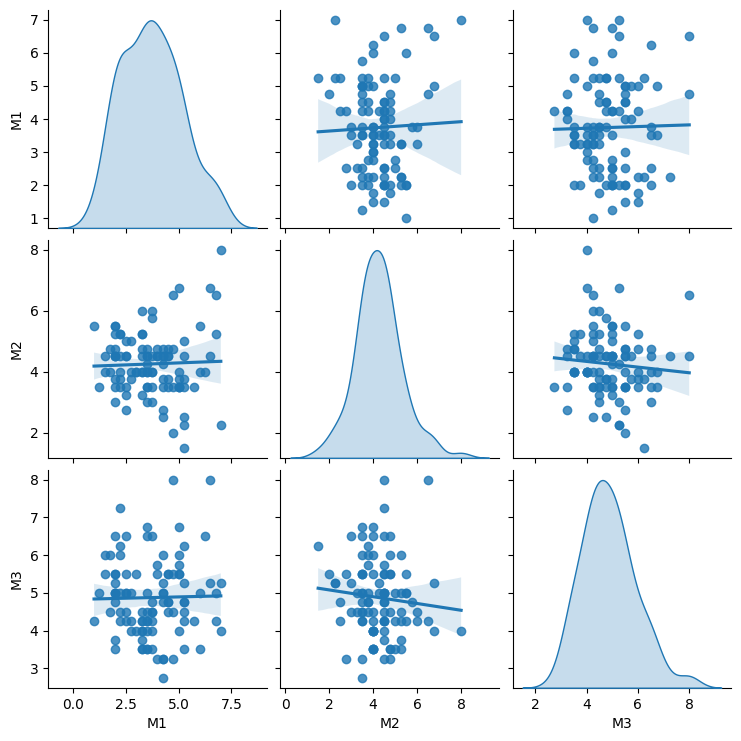

In [66]:
# Câu hỏi: Tương quan tuyến tính (M1, M2) của nhóm giới tính nào cao hơn

sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()


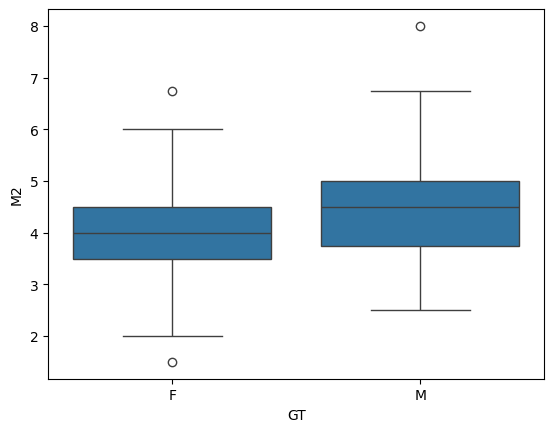

In [67]:

sns.boxplot(x='GT',y='M2',data=df)
plt.show()
# 1. M2 trên giới tính nào có bất thường
# 2. Có dễ dàng dự báo M2 theo yếu tố giới tính (GT) hay không?


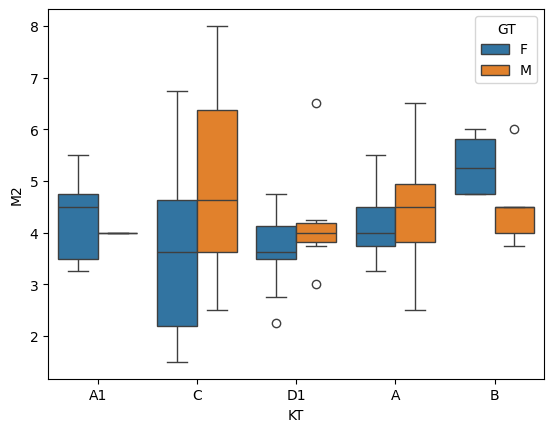

In [68]:

sns.boxplot(x='KT', y='M2',hue='GT',data=df)
plt.show()
# Câu hỏi: Xác định các biểu đồ có dữ liệu bất thường 


In [69]:

# Phân tích đa biến định lượng (multivariate analysis)
df[['M1','M2']].cov()

# Bài tập: Xây dựng ma trận phương sai M1, M2, M3.
# So sánh sự tương quan (ảnh hưởng, tác động, liên hệ) giữa 
# M1 so với M3 
# M2 so với M3


,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


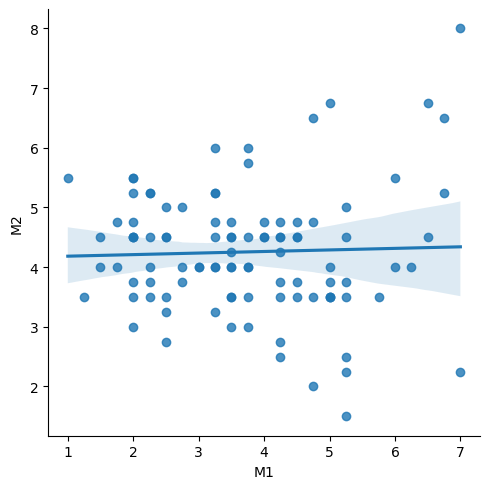

In [70]:

df[['M1','M2']].corr()

sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()


In [71]:

# Câu hỏi: Vẽ biểu đồ khám phá tương quan tuyến tính giữa M2 và M3

df[['M1','M2','M3']].corr()
# Câu hỏi: Hãy viết code sắp xếp tăng dần mức độ tác động (tương quan tuyến tính) của M2, M3 đến M1
# Câu hỏi: Hãy viết code tìm cặp tương quan tuyến tính cao nhất


,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


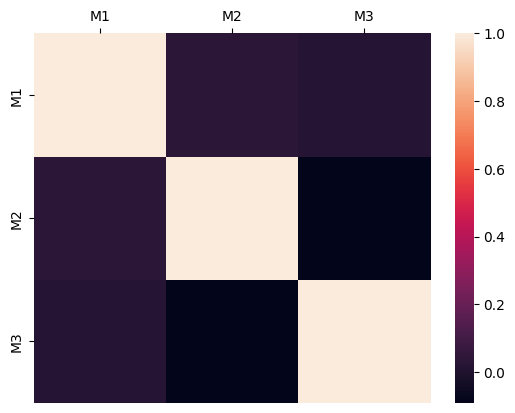

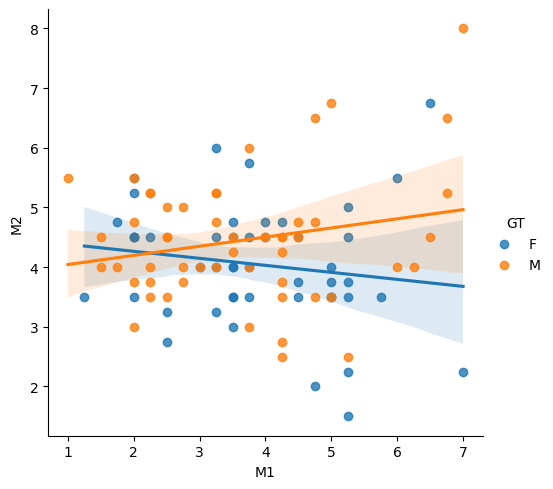

In [72]:

sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()
# Câu hỏi: Tương quan tuyến tính (M1, M2) của nhóm giới tính nào cao hơn


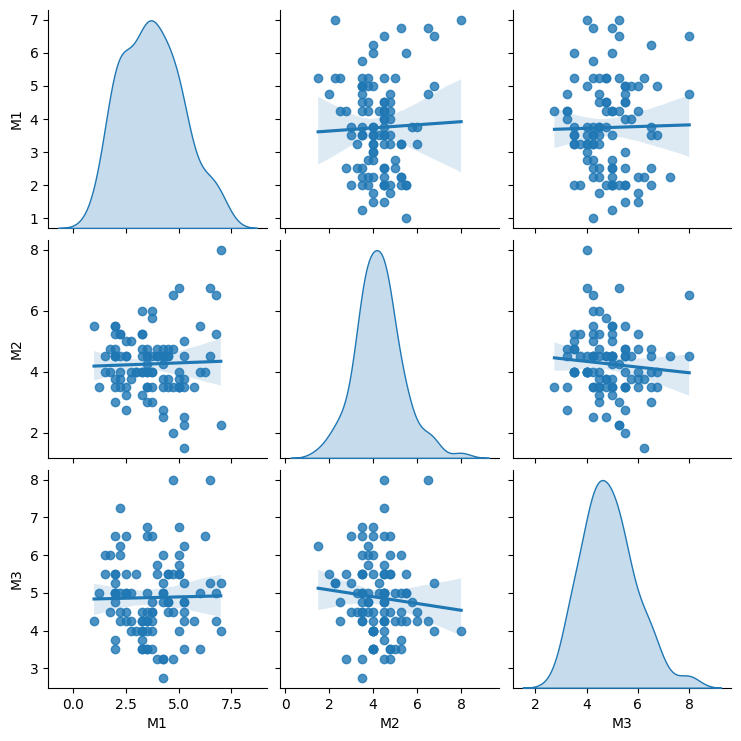

In [73]:

sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()


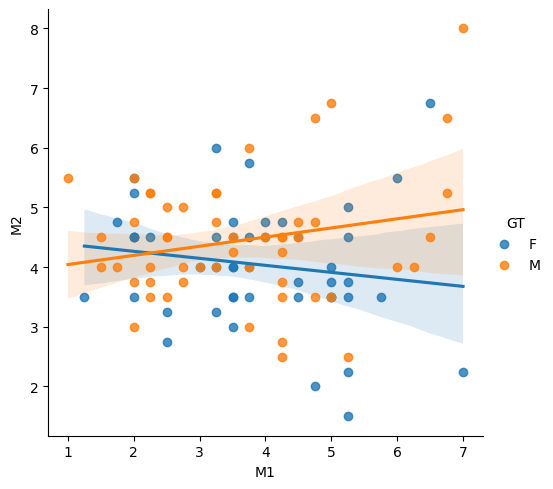

In [74]:

sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()
# Câu hỏi: Tương quan tuyến tính (M1, M2) của nhóm giới tính nào cao hơn


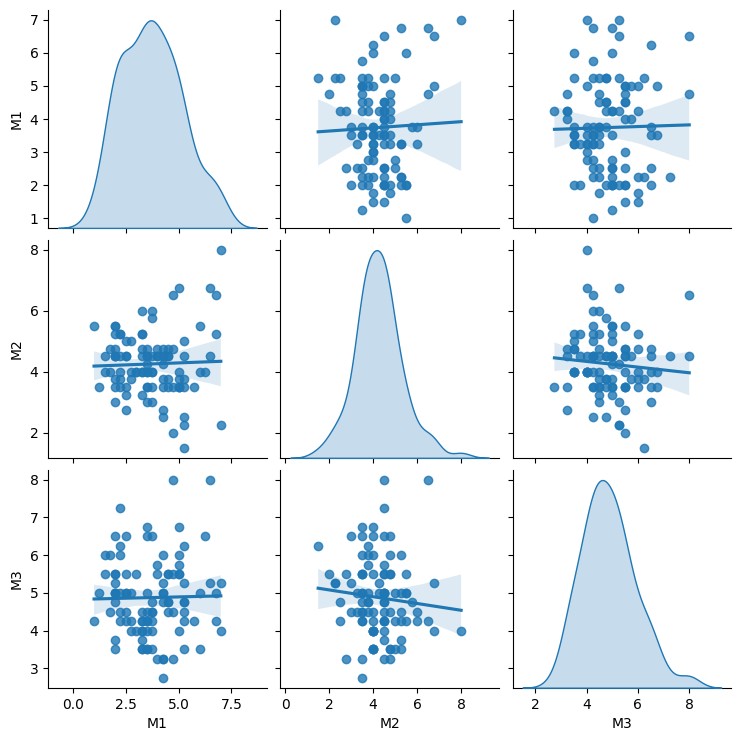

In [75]:

sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()
